In [2]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [3]:
river='St_Clair_R'

location = (42.813370, -82.483370)

### Discharge 

In [4]:
discharge = pd.read_excel('../../measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx', sheet_name='discharge_cms')
for c in discharge.columns:
    discharge = discharge.rename(
        index=str, columns={c: c.lower().strip()})
discharge['date'] = pd.to_datetime(discharge[['year', 'month', 'day']])
discharge = discharge[['date', 'stclair_r']]
discharge['Discharge, cms']  = discharge['stclair_r']
discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028





In [5]:
discharge = discharge.set_index('date')
discharge = discharge['Discharge, cms']


Text(0.5,0,'Year')

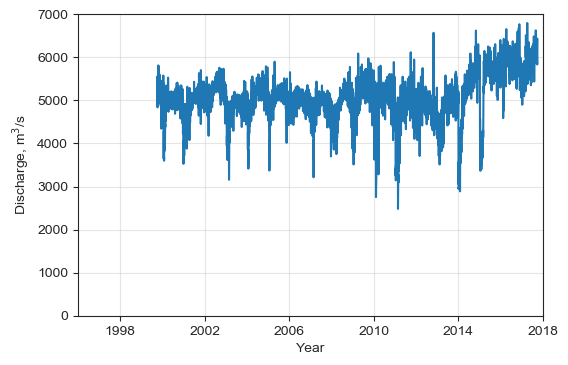

In [6]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(data=discharge,ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


# ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site)], loc='best', fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.savefig('One_by_one/Canada/'+river+'/'+river+'_Q.pdf')
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_Q.pdf')

### Concentrations

In [608]:
Port_Lambton = pd.read_excel('../../measurements/ECCC/ST_Clair_River_Concentrations_from_Dabbie.xlsx', sheet_name='Port_Lambton')


Point_Edward = pd.read_excel('../../measurements/ECCC/ST_Clair_River_Concentrations_from_Dabbie.xlsx', sheet_name='Point_Edward')



Point_Edward.head()

Port_Lambton.head()

Port_Lambton['Station'] = 'Port Lambton'
Point_Edward['Station'] = 'Point Edward'


for c in Point_Edward.columns:
    Point_Edward = Point_Edward.rename(index=str, columns={c: c.lower().strip()})

for c in Port_Lambton.columns:
    Port_Lambton = Port_Lambton.rename(index=str, columns={c: c.lower().strip()})

Port_Lambton.columns

Point_Edward.columns

# res.shape

# concentrations = pd.concat([Port_Lambton, Point_Edward])
concentrations = pd.concat([Point_Edward])
concentrations['tp'] = pd.to_numeric(concentrations['tp'])
concentrations['yyyymmdd'] = pd.to_datetime(concentrations['yyyymmdd'], format='%Y%m%d', errors='coerce')


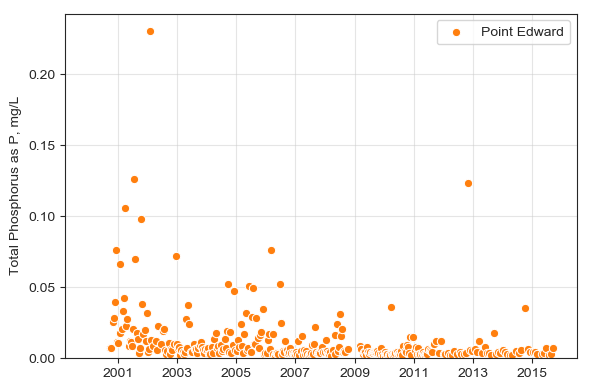

In [610]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(concentrations[concentrations.station=='Port Lambton']['yyyymmdd'], concentrations[concentrations.station=='Port Lambton']['tp'], markers=True, label='Port Lambton')
ax = sns.scatterplot(concentrations[concentrations.station=='Point Edward']['yyyymmdd'], concentrations[concentrations.station=='Point Edward']['tp'], markers=True, label='Point Edward')
ax.legend(loc=1)
plt.ylim(0,None)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
# plt.savefig('One_by_one/Canada/'+river+'/'+river+'_TP.pdf')
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_TP.pdf')



In [611]:
concentrations = concentrations.set_index('yyyymmdd')
# concentrations = concentrations[concentrations.station=='Port Lambton']['tp']
concentrations = concentrations['tp']

### EGRET estimates

In [10]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Sample.csv')


EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


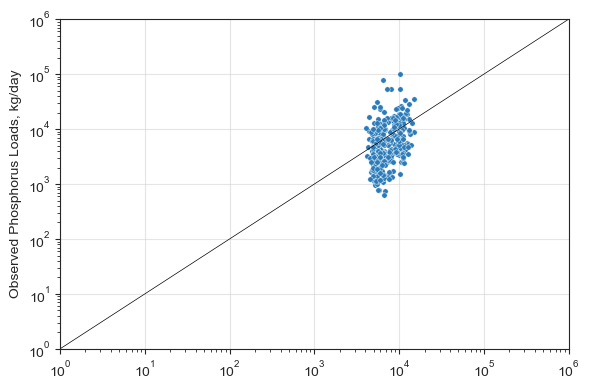

In [11]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
plt.xlim(1,1000000)
plt.ylim(1,1000000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
plt.xlabel("")
plt.tight_layout()



### Meteo Buoys

In [12]:
buoy_14129 = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/buoy_data/buoy_14129.csv')
buoy_45149 = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/buoy_data/buoy_45149.xlsx')



In [13]:
buoy_45149.DATE = pd.to_datetime(buoy_45149.DATE, errors='coerce')
buoy_14129.DATE = pd.to_datetime(buoy_14129.DATE, errors='coerce')


In [14]:
for c in buoy_14129.columns[2:]:
    buoy_14129[c] = pd.to_numeric(buoy_14129[c], errors='coerce')
    buoy_45149[c] = pd.to_numeric(buoy_45149[c], errors='coerce')

In [15]:
buoy_14129.set_index('DATE', inplace=True)
buoy_45149.set_index('DATE', inplace=True)

In [16]:
buoy_45149 = buoy_45149.resample('D', how = 'mean')
buoy_14129 = buoy_14129.resample('D', how = 'mean')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


In [17]:
buoy_45149 = buoy_45149.dropna(axis=1, how='all').dropna()
buoy_14129 = buoy_14129.dropna(axis=1, how='all').dropna()


### Water Level

In [18]:
WL_point_edward = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/water_levels/water_level_t. 11940_PointEdward_1999_2016_timeUTC.csv', skiprows=7)

In [19]:
WL_point_edward
WL_point_edward.Obs_date = pd.to_datetime(WL_point_edward.Obs_date, errors='coerce')

WL_point_edward = WL_point_edward[['Obs_date', 'SLEV(metres)']]


In [20]:
WL_point_edward.set_index('Obs_date', inplace=True)

### Wave data

In [21]:
wd_271 = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/wave_data/ST93271_v01.csv',  header=None)




In [22]:
wd_271[0] = pd.to_datetime(wd_271[0], errors='coerce', format='%Y%m%d%H%M%S')
wd_271 = wd_271.set_index(0)
wd_271 = wd_271.loc['1996-01-01':'2019-01-01']
wd_271 = wd_271.resample('D', how = 'mean').dropna(axis=1, how='all').dropna()


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.


In [23]:
wd_271.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,,,,,,,,,,,,,,,,,,,,,
1996-01-01,93271.0,43.08,-82.36,3.475000,58.708333,0.105417,0.948333,0.099583,0.370417,4.459167,...,49.833333,13.791667,0.365000,4.553750,4.518333,3.974583,3.669583,3.487083,50.875000,19.125000
1996-01-02,93271.0,43.08,-82.36,7.125000,32.416667,0.267083,1.377917,0.646667,0.965833,6.252500,...,19.125000,19.291667,0.645000,6.517917,6.490417,6.190000,5.971667,5.815000,209.500000,10.875000
1996-01-03,93271.0,43.08,-82.36,8.754167,28.166667,0.348750,1.568333,0.794583,1.214583,5.991250,...,18.000000,20.625000,0.541667,6.868750,6.810417,6.662917,6.509167,6.372083,221.125000,13.666667
1996-01-04,93271.0,43.08,-82.36,3.354167,150.666667,0.104583,0.948750,0.122083,0.483333,5.052917,...,181.250000,12.791667,0.468750,5.052917,4.996250,4.533750,4.261667,4.057083,6.958333,12.833333
1996-01-05,93271.0,43.08,-82.36,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000


## Lake Huron TP

In [24]:
LH = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/Lake_Huron_GLIP_Lambton.xlsx')

In [25]:
LH = LH[LH.TEST_DESCRIPTION == 'PHOSPHORUS,UNFILTERED TOTAL'][['SAMPLING_DATE', 'VALUE']]

In [26]:
LH.SAMPLING_DATE = pd.to_datetime(LH.SAMPLING_DATE, errors='coerce')

In [27]:
LH.set_index('SAMPLING_DATE', inplace=True)

In [28]:
LH['LH_TP'] = LH['VALUE']
LH = LH['LH_TP']

# AI

In [634]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import ml_metrics, string, re, pylab as pl
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, explained_variance_score, accuracy_score
from sklearn import svm

In [472]:
import itertools

In [435]:
# Index(['tp', 'LH_TP', 'Discharge, cms', 'Q_FLAG', 'LATITUDE', 'LONGITUDE',
#        'DEPTH', 'VCAR', 'VTPK', 'VWH$', 'VCMX', 'VTP$', 'WDIR', 'WSPD', 'GSPD',
#        'WDIR.1', 'WSPD.1', 'GSPD.1', 'ATMS', 'DRYT', 'SSTP'],

In [526]:
params = ['Q_FLAG', 'LATITUDE', 'LONGITUDE',
       'DEPTH', 'VCAR', 'VTPK', 'VWH$', 'VCMX', 'VTP$', 'WDIR', 'WSPD', 'GSPD',
       'WDIR.1', 'WSPD.1', 'GSPD.1', 'ATMS', 'DRYT', 'SSTP']

In [527]:
len(params)

18

In [574]:
len([param for param in itertools.combinations(params, 9)])

48620

In [605]:
res_r2 = []
for param in itertools.combinations(params, 10):
#     print()
#     print(param)
    df = concentrations.to_frame().join(
        discharge, how='inner').join(
        buoy_45149[list(param)], how='inner')

#     .join(
#         LH, how='inner')
    # .join(
    #     discharge, how='inner').join(
    #     WL_point_edward, how='inner').join(
    #     buoy_45149, how='inner')
    #     .join(
    #         wd_271, how='inner')

    # df.dropna().shape

    # pd.to_numeric(df[features])

    # X = df.values[::, 1:]

    # y = df.values[::, 0]

    # ['Discharge, cms'
    # 'SLEV(metres)'
    # 'DOY',
    # 'DOY_sin',
    # 'DOY_cos',
    # 'WNDDIR_sin']



    features = list(df.columns[1:])
    target = [df.columns[0]]

    # features

    # features = ['Discharge, cms',
    # 'LH_TP',
    # 'SLEV(metres)',
    # 'DOY',
    # 'DOY_sin',
    # 'DOY_cos',
    # 'WNDDIR_sin',
    # 'WNDDIR_cos']
#     df['DOY'] = df.index.dayofyear
    from sklearn.cross_validation import train_test_split

    train = df.sample(frac=0.99)
    test = df.loc[~df.index.isin(train.index)]

    def pc_bias(s, o):
        """
        Percent Bias
        input:
            s: simulated
            o: observed
        output:
            pc_bias: percent bias
        """
        return np.mean(100.0 * sum(s - o) / sum(o))

    metrics = [mean_squared_error, r2_score, median_absolute_error, explained_variance_score, pc_bias]

    models = []
    models.append(linear_model.LinearRegression(normalize=True, fit_intercept=False))
#     models.append(RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, random_state=1, n_jobs=6))
    # models.append(linear_model.Ridge())
    # models.append(linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0]))
    # models.append(linear_model.LassoCV(alphas=[0.1, 1.0, 10.0], positive=True))
    # models.append(linear_model.ElasticNetCV(alphas=[0.1, 1.0, 10.0]))
    # models.append(linear_model.Lars())
    # models.append(linear_model.LassoLarsCV())
    # models.append(linear_model.Lasso(positive=True))
    # models.append(linear_model.OrthogonalMatchingPursuitCV())
    # models.append(linear_model.BayesianRidge())
    # models.append(linear_model.ElasticNet(positive=True))

    # models.append(RANSACRegressor())
    # models.append(TheilSenRegressor())
    # models.append(linear_model.HuberRegressor())

    predicted_results = np.empty((len(models),len(train[target].values),))
    results = {}
#     plt.figure(figsize=(10, 10)) 
    for i,model in enumerate(models):
        name = str(model).split('(')[0]
        results[name] = {}
        model.fit(train[features], train[target])
        results[name] = {'score': model.score(train[features], train[target]), 'model':name}
#         print(str(model).split('(')[0], 'method score:', results[name]['score'])
        res_r2.append([param, model.score(train[features], train[target])])
#         for m in metrics:
#             results[name][m.__name__] = m(model.predict(train[features]), train[target].values)
#             print(m.__name__,':', results[name][m.__name__])
#         predicted_results[i,:] = model.predict(train[features]).flatten()
#         plt.figure()
#     #     sns.boxplot(x=train[target].values.flatten(), y=model.predict(train[features]).flatten())
#         plt.scatter(train[target].values, model.predict(train[features]))
#     #     plt.ylim(0,10)
#         plt.ylabel('Predicted by the model')
#         plt.xlabel('Measured in the river')
#         # plt.xlim(0,10)
#         plt.grid(alpha=0.5)
#     #     plt.ylim(-1,11)
#     #     plt.xlim(-1,11)
#         plt.show()






KeyboardInterrupt: 

In [586]:
temp = 0

for res in res_r2:
    if res[1]>temp:
        temp = res[1]
        temp_2 = res[0]

In [590]:
temp_2

('Q_FLAG',
 'LONGITUDE',
 'VTPK',
 'VWH$',
 'VCMX',
 'WSPD',
 'GSPD',
 'ATMS',
 'DRYT',
 'SSTP')

In [455]:
df = df[df>0].dropna(axis=1, how='all').dropna()

In [456]:
df.shape

(20, 5)

In [457]:
# df['DOY'] = df.index.dayofyear
# df['DOY_sin'] = np.sin(df.DOY/365*2*3.14)
# df['DOY_cos'] = np.sin(df.DOY/365*2*3.14)

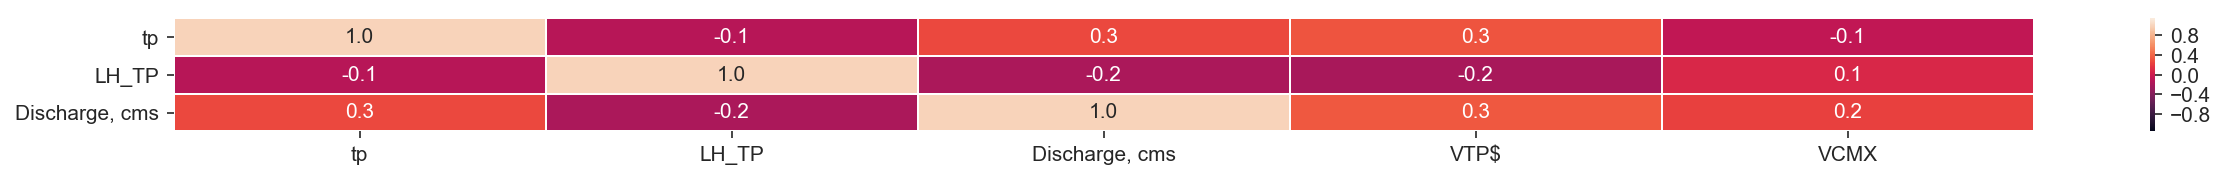

In [458]:
# # df['DOY_sin'] = np.sin(df.DOY/365*2*3.14)
# # df['DOY_cos'] = np.sin(df.DOY/365*2*3.14)

# # df['WNDDIR_sin'] = np.sin(df[5]/360*2*3.14)
# # df['WNDDIR_cos'] = np.cos(df[5]/360*2*3.14)

# plt.figure(figsize=(20,1),dpi=150)
# sns.heatmap(df.corr()[0:3], vmin=-1.15, vmax=1.15,  annot=True, linewidths=.5, fmt= '.1f')
# # plt.tight_layout()
# # plt.savefig('correlations.png', dpi=90)

LinearRegression method score: -0.12476214211365844
mean_squared_error : 0.00014165955637722858
r2_score : -2.8134154414029675
median_absolute_error : 0.005745969350178551
explained_variance_score : -2.786702241907853
pc_bias : -10.459035824704298


<Figure size 900x900 with 0 Axes>

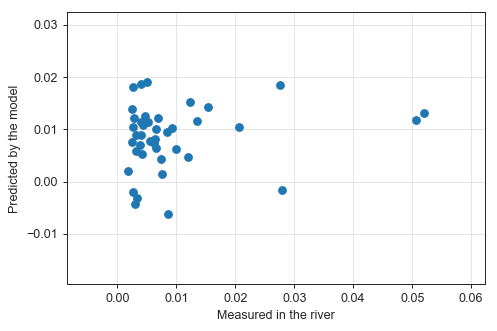

RandomForestRegressor method score: -0.7173583132914103
mean_squared_error : 0.00021629481264761756
r2_score : -1.425967396285254
median_absolute_error : 0.0032746628843742026
explained_variance_score : -1.4259671510790053
pc_bias : 0.04909182273529402


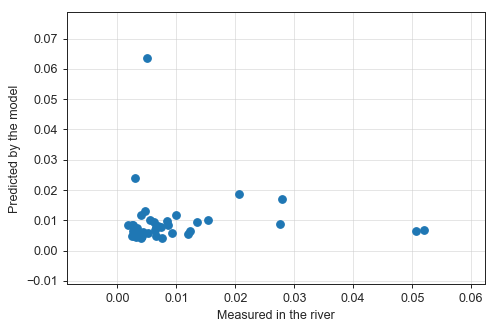

DecisionTreeRegressor method score: -3.2249681960693843
mean_squared_error : 0.0005321188346883468
r2_score : -0.3619496538014704
median_absolute_error : 0.0038499999999999997
explained_variance_score : -0.3601704998528532
pc_bias : 8.753734528382422


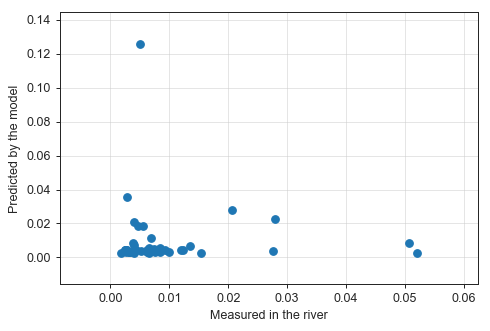

Ridge method score: -0.0195434511227226
mean_squared_error : 0.00012840765846007548
r2_score : -3.212836135637785
median_absolute_error : 0.005061358728588974
explained_variance_score : -3.1847060532724054
pc_bias : -9.722019777582387


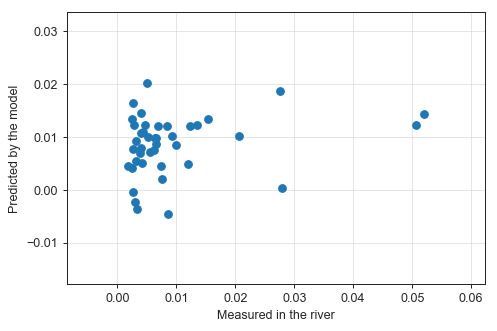

RidgeCV method score: 0.01017870256198683
mean_squared_error : 0.00012466426512569502
r2_score : -5.60746166099802
median_absolute_error : 0.004101489411431316
explained_variance_score : -5.5985628234810605
pc_bias : -4.302125960138789


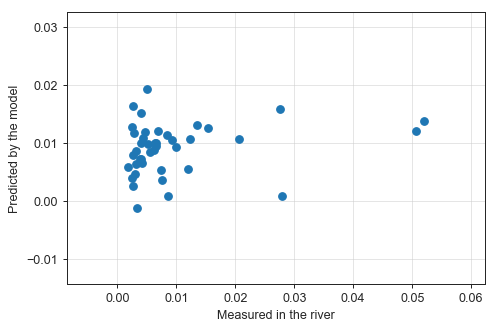

LassoCV method score: -0.006415927525070809
mean_squared_error : 0.00012675429629616027
r2_score : -4.2121339805718125e+31
median_absolute_error : 0.0062233128834355824
explained_variance_score : -4.185281517682344e+31
pc_bias : 9.438112220450423


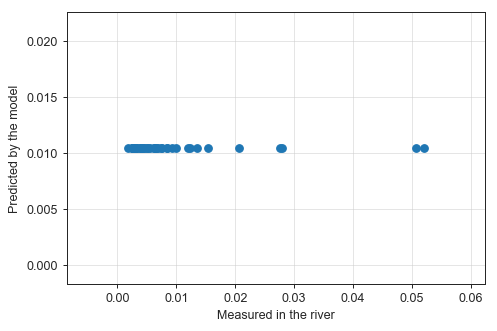

ElasticNetCV method score: -0.006415927525070809
mean_squared_error : 0.00012675429629616027
r2_score : -4.2121339805718125e+31
median_absolute_error : 0.0062233128834355824
explained_variance_score : -4.185281517682344e+31
pc_bias : 9.438112220450423


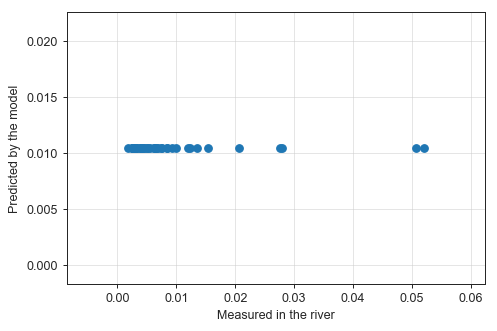

Lars method score: -0.1252525092796244
mean_squared_error : 0.0001417213162752477
r2_score : -2.71337205287668
median_absolute_error : 0.005465625
explained_variance_score : -2.630041448999881
pc_bias : -18.723991677336752


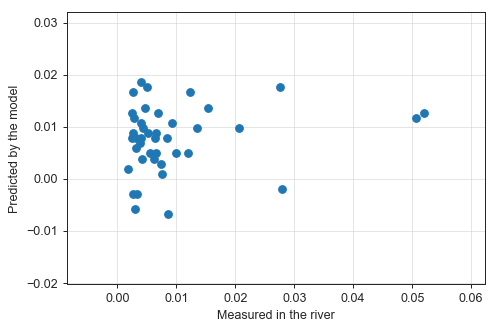

LassoLarsCV method score: -0.006415927525070809
mean_squared_error : 0.00012675429629616027
r2_score : -4.2121339805718125e+31
median_absolute_error : 0.0062233128834355824
explained_variance_score : -4.185281517682344e+31
pc_bias : 9.438112220450423


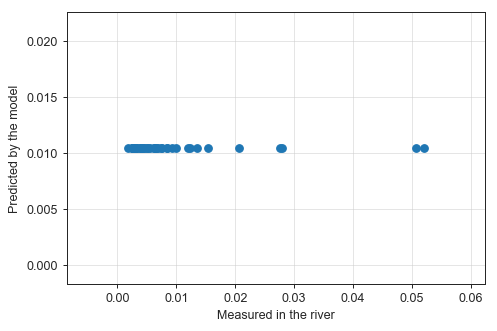

Lasso method score: -0.006415927525070809
mean_squared_error : 0.00012675429629616027
r2_score : -4.2121339805718125e+31
median_absolute_error : 0.0062233128834355824
explained_variance_score : -4.185281517682344e+31
pc_bias : 9.438112220450423


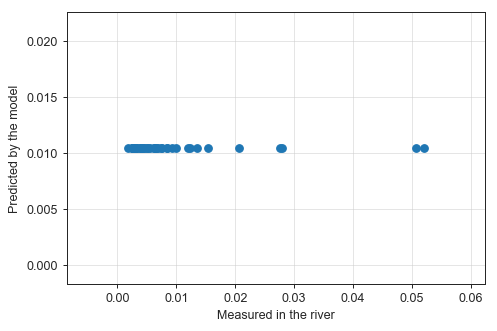

OrthogonalMatchingPursuitCV method score: 0.0009717079198919842
mean_squared_error : 0.00012582385143086326
r2_score : -28.18356738026102
median_absolute_error : 0.005032535616245716
explained_variance_score : -28.183332376041786
pc_bias : -0.33420500252198115


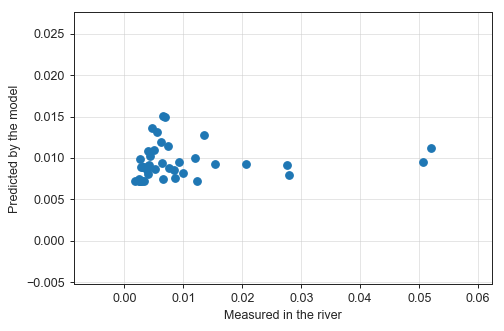

BayesianRidge method score: -0.07998525120213373
mean_squared_error : 0.0001360200755794857
r2_score : -16.703640351368698
median_absolute_error : 0.005366918202951395
explained_variance_score : -16.609716110294666
pc_bias : 8.919117442466181


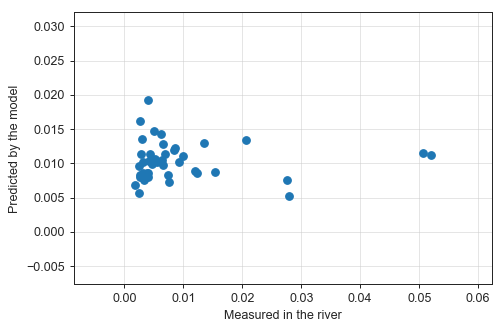

ElasticNet method score: -0.006415927525070809
mean_squared_error : 0.00012675429629616027
r2_score : -4.2121339805718125e+31
median_absolute_error : 0.0062233128834355824
explained_variance_score : -4.185281517682344e+31
pc_bias : 9.438112220450423


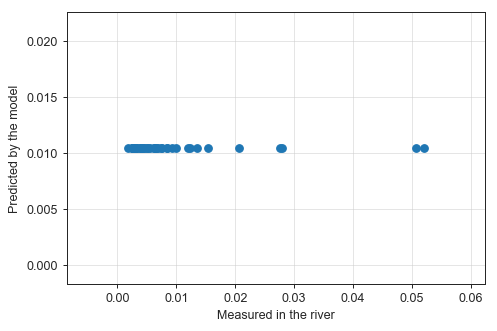

TheilSenRegressor method score: -0.06468486822512398
mean_squared_error : 0.00013409304995889374
r2_score : -4.330811499758101
median_absolute_error : 0.003228448472140274
explained_variance_score : -4.082277914256749
pc_bias : -26.25196597270899


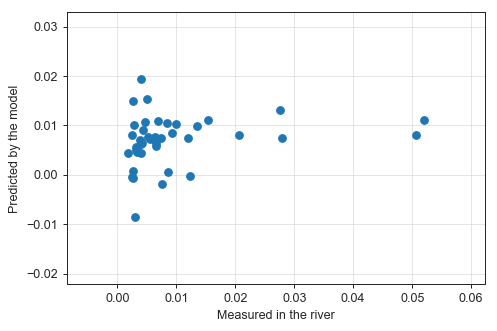

HuberRegressor method score: -0.1588964810285145
mean_squared_error : 0.00014595864782675203
r2_score : -83.81146425813067
median_absolute_error : 0.00235177182157212
explained_variance_score : -74.16094446463775
pc_bias : -42.78837629198323


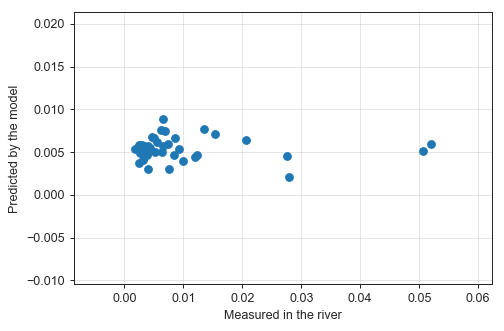

In [654]:
df = concentrations.to_frame().join(
    discharge, how='inner').join(
    buoy_45149, how='inner').join(
        WL_point_edward, how='inner')

    # .join(
    #     discharge, how='inner').join(
    #     WL_point_edward, how='inner').join(
    #     buoy_45149, how='inner')
    #     .join(
    #         wd_271, how='inner')

# df.dropna().shape

# df['WNDDIR_sin'] = np.sin(df['WDIR']/360*2*3.14)
# df['WNDDIR_cos'] = np.cos(df['WDIR']/360*2*3.14)
# df['DOY'] = df.index.dayofyear
# df['DOY_sin'] = np.sin(df.DOY/365*2*3.14)
# df['DOY_cos'] = np.sin(df.DOY/365*2*3.14)
# pd.to_numeric(df[features])

# X = df.values[::, 1:]

# y = df.values[::, 0]

# ['Discharge, cms'
# 'SLEV(metres)'
# 'DOY',
# 'DOY_sin',
# 'DOY_cos',
# 'WNDDIR_sin']



features = list(df.columns[1:])
target = [df.columns[0]]

# features

# features = ['Discharge, cms',
# 'LH_TP',
# 'SLEV(metres)',
# 'DOY',
# 'DOY_sin',
# 'DOY_cos',
# 'WNDDIR_sin',
# 'WNDDIR_cos']

from sklearn.cross_validation import train_test_split

train = df.sample(frac=0.8)
test = df.loc[~df.index.isin(train.index)]

def pc_bias(s, o):
    """
    Percent Bias
    input:
        s: simulated
        o: observed
    output:
        pc_bias: percent bias
    """
    return np.mean(100.0 * sum(s - o) / sum(o))

metrics = [mean_squared_error, r2_score, median_absolute_error, explained_variance_score, pc_bias]

models = []
models.append(linear_model.LinearRegression(normalize=True, fit_intercept=False))
models.append(RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, random_state=1, n_jobs=6))
models.append(DecisionTreeRegressor())
models.append(linear_model.Ridge())
models.append(linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0]))
models.append(linear_model.LassoCV(alphas=[0.1, 1.0, 10.0], positive=True))
models.append(linear_model.ElasticNetCV(alphas=[0.1, 1.0, 10.0]))
models.append(linear_model.Lars())
models.append(linear_model.LassoLarsCV())
models.append(linear_model.Lasso(positive=True))
models.append(linear_model.OrthogonalMatchingPursuitCV())
models.append(linear_model.BayesianRidge())
models.append(linear_model.ElasticNet(positive=True))

# models.append(RANSACRegressor())
models.append(TheilSenRegressor())
models.append(linear_model.HuberRegressor())

predicted_results = np.empty((len(models),len(test[target].values),))
results = {}
plt.figure(figsize=(10, 10)) 
for i,model in enumerate(models):
    name = str(model).split('(')[0]
    results[name] = {}
    model.fit(train[features], train[target])
    results[name] = {'score': model.score(test[features], test[target]), 'model':name}
    print(str(model).split('(')[0], 'method score:', results[name]['score'])
    
    for m in metrics:
        results[name][m.__name__] = m(model.predict(test[features]), test[target].values)
        print(m.__name__,':', results[name][m.__name__])
    predicted_results[i,:] = model.predict(test[features]).flatten()
    plt.figure()
#     sns.boxplot(x=train[target].values.flatten(), y=model.predict(train[features]).flatten())
    plt.scatter(test[target].values, model.predict(test[features]))
#     plt.ylim(0,10)
    plt.ylabel('Predicted by the model')
    plt.xlabel('Measured in the river')
    # plt.xlim(0,10)
    plt.grid(alpha=0.5)
#     plt.ylim(-1,11)
#     plt.xlim(-1,11)
    plt.show()
    

In [640]:
from sklearn import tree

In [646]:
dot_data = tree.export_graphviz(models[2], out_file=None)

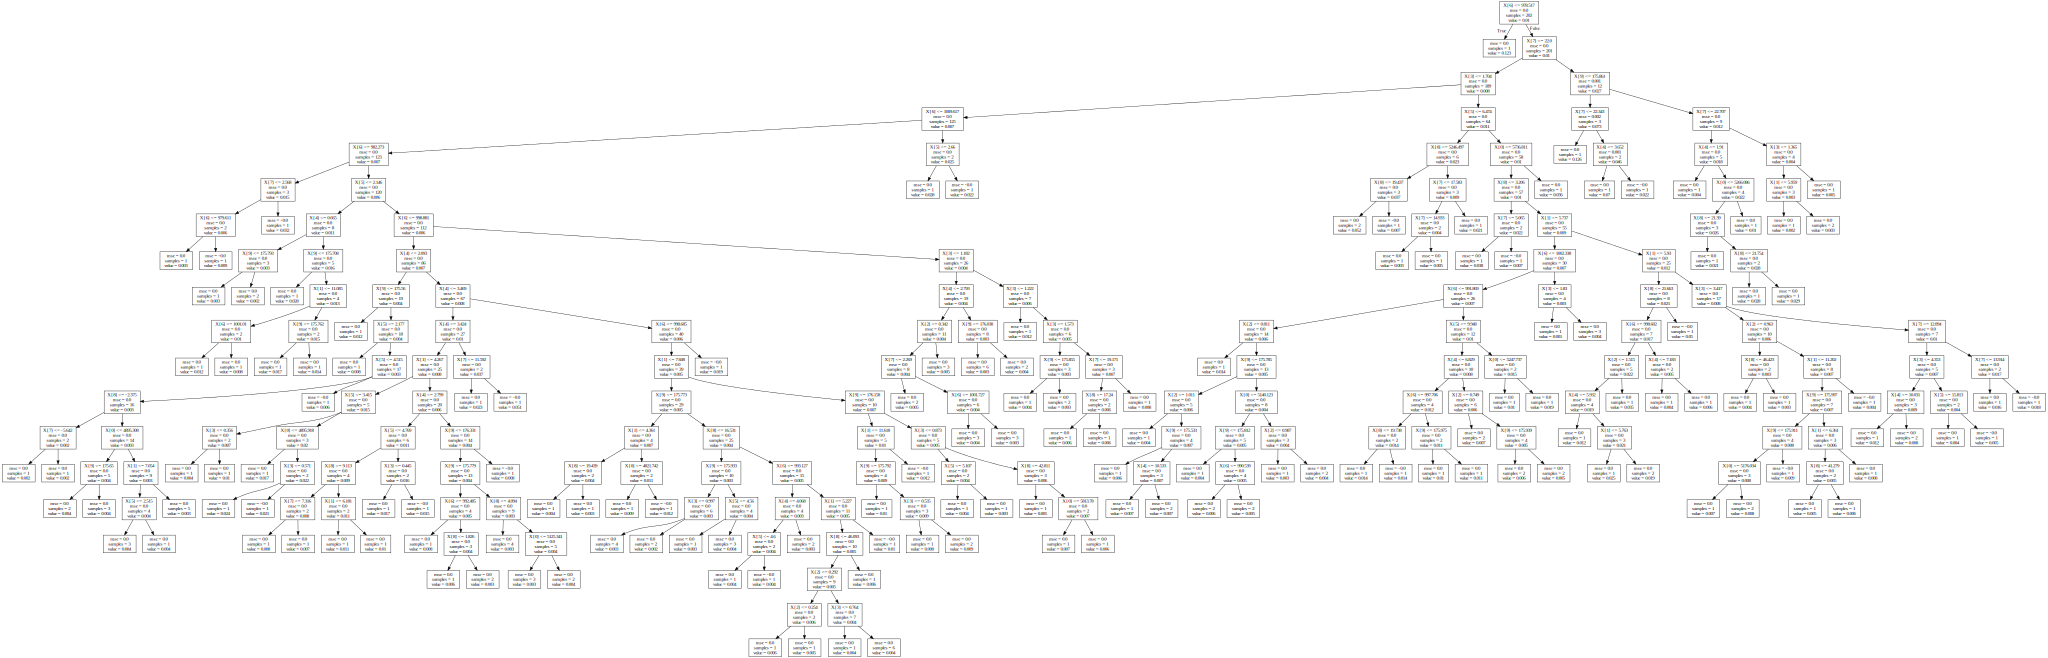

In [647]:
# import graphviz 
# graph = graphviz.Source(dot_data)  
# graph

In [626]:
imp_feat = [[f,v] for f,v in zip(features, models[1].feature_importances_)]

In [628]:
sorted(imp_feat, key=lambda x: x[1])[::-1]

[['ATMS', 0.27969341785492535],
 ['DRYT', 0.20661924620338912],
 ['SLEV(metres)', 0.13009146270815658],
 ['SSTP', 0.07904779469437147],
 ['VTPK', 0.06984560491318349],
 ['VCMX', 0.06498423566923325],
 ['VWH$', 0.046436527593454374],
 ['Discharge, cms', 0.046335220555668265],
 ['GSPD', 0.04090790647310081],
 ['WSPD', 0.03603858333451798]]

In [601]:
[c for c in zip(features, model.coef_.flatten())]

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [426]:
model.coef_

array([[-1.75611581e-01, -1.60634591e-07,  1.09277734e-04]])

In [427]:
res_pd_reg = pd.DataFrame(results).transpose()

In [115]:
res_dict=results

In [50]:
res_pd_reg.sort_values(['score'], ascending=0)

,explained_variance_score,mean_squared_error,median_absolute_error,model,pc_bias,r2_score,score
RandomForestRegressor,0.176156,0.000185375,0.00465251,RandomForestRegressor,1.04363,0.17602,0.628013
Lars,-23.4271,0.00047874,0.00860617,Lars,6.01631e-13,-23.4271,0.0393281
Ridge,-25.4992,0.000478827,0.00863183,Ridge,-5.72525e-12,-25.4992,0.0391546
OrthogonalMatchingPursuitCV,-24.0138,0.000479182,0.00878786,OrthogonalMatchingPursuitCV,1.12289e-12,-24.0138,0.0384411
LassoLarsCV,-43.0906,0.000480442,0.00902461,LassoLarsCV,1.17018e-12,-43.0906,0.0359138
RidgeCV,-35.0565,0.000480887,0.00884059,RidgeCV,-5.14551e-13,-35.0565,0.0350198
BayesianRidge,-69.8475,0.000486785,0.00947231,BayesianRidge,1.31724e-13,-69.8475,0.0231842
ElasticNetCV,-201.59,0.000494209,0.0100487,ElasticNetCV,1.07013e-14,-201.59,0.00828773
LassoCV,-454.426,0.000495118,0.0100473,LassoCV,1.46136e-14,-454.426,0.00646211
Lasso,-1.03501e+31,0.000498339,0.00982085,Lasso,1.81241e-14,-1.03501e+31,0


In [51]:
{f:v for f,v in zip(features, models[0].feature_importances_)}

{'Discharge, cms': 0.13585084125087357,
 'SLEV(metres)': 0.14581850773345612,
 'DOY': 0.17797207030253842,
 'DOY_sin': 0.09964221770238621,
 'DOY_cos': 0.09835403378996359,
 'WNDDIR_sin': 0.17006307523716857,
 'WNDDIR_cos': 0.1722992539836135}

In [52]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    BernoulliNB(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    LabelPropagation(),
    LabelSpreading(),
    LinearDiscriminantAnalysis(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    MLPClassifier(),
    NearestCentroid(),
    RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, random_state=1, n_jobs=6),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SVC(),
    GradientBoostingClassifier(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    SGDClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    RidgeClassifierCV(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
]

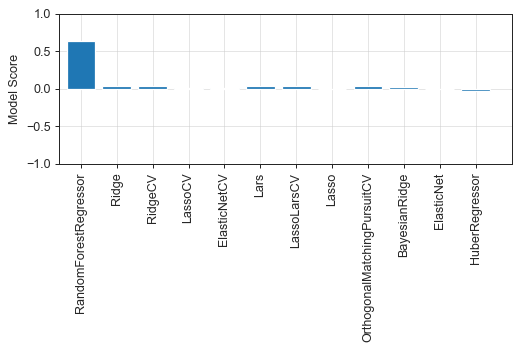

In [53]:
fig, ax = plt.subplots(figsize=(6,4))

ax.bar(res_pd_reg.index,res_pd_reg['score'])
plt.ylabel('Model Score')
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.xlim(-0.6,12)
plt.ylim(-1.,1.)
plt.tight_layout()
# plt.savefig('models_perform.png', dpi=90)
plt.show()

In [54]:
tp
Discharge, cms
VCAR
VTPK
VTP$
WDIR
WSPD
GSPD
ATMS
SSTP


SyntaxError: invalid syntax (<ipython-input-54-c49383b3cc5e>, line 5)

In [ ]:
df.corr()['tp']

In [ ]:
df[4]